In [1]:
import pandas as pd
import numpy as np
import requests as req
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from reportlab.pdfgen import *
from reportlab.lib.pagesizes import A4, letter
import time
from fpdf import FPDF  


df=pd.read_csv('gtd.csv', encoding="ISO-8859-1")
df1 = df.drop(columns=["Unnamed: 0","vicinity"])
df1.rename(columns={'imonth':'mes','country_txt':'NCountry','region_txt':'region','nkill':'killed', 'nwound':'herido'},inplace=True)
df1["afectados"]= df1["killed"]+ df1["herido"]
df1.head()

,iyear,mes,extended,country,NCountry,region,region,provstate,latitude,longitude,attacktype1_txt,gname,weaptype1_txt,killed,herido,afectados
0,1970,7,0,58,Dominican Republic,2,Central America & Caribbean,NaN,18.456792,-69.951164,Assassination,MANO-D,Unknown,1.0,0.0,1.0
1,1970,0,0,130,Mexico,1,North America,Federal,19.371887,-99.086624,Hostage Taking (Kidnapping),23rd of September Communist League,Unknown,0.0,0.0,0.0
2,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,15.478598,120.599741,Assassination,Unknown,Unknown,1.0,0.0,1.0
3,1970,1,0,78,Greece,8,Western Europe,Attica,37.997490,23.762728,Bombing/Explosion,Unknown,Explosives,NaN,NaN,NaN
4,1970,1,0,101,Japan,4,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Unknown,Incendiary,NaN,NaN,NaN


In [2]:
#URL a scrapear
url = 'https://countrycode.org'

In [3]:
def scrapear(url, css):
    res = req.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    ss = soup.select(css)
    l=list(map(lambda x : x.text.strip(),ss))
    return l

pais =scrapear(url, "tr td a")
eco=scrapear(url, "tr td")[3::6]
ec=eco[:240]

paises= pais[:240]
pas=scrapear(url, "tr td")[5::6]
pasta=pas[:240]
len(paises)

240

In [4]:
pai=pd.DataFrame()
pai["paises"]= paises
pai["pob"]= ec
pai["pasta"]= pasta

pai.head()

,paises,pob,pasta
0,Afghanistan,"29,121,286",20.65 Billion
1,Albania,"2,986,952",12.8 Billion
2,Algeria,"34,586,184",215.7 Billion
3,American Samoa,"57,881",462.2 Million
4,Andorra,"84,000",4.8 Billion


In [5]:
merged = pai.merge(df1, left_on = 'paises', right_on = 'NCountry')
merged.head()

,paises,pob,pasta,iyear,mes,extended,country,NCountry,region,region,provstate,latitude,longitude,attacktype1_txt,gname,weaptype1_txt,killed,herido,afectados
0,Afghanistan,"29,121,286",20.65 Billion,1973,5,0,4,Afghanistan,6,South Asia,Kabul,34.516895,69.147011,Unknown,Black December,Unknown,0.0,1.0,1.0
1,Afghanistan,"29,121,286",20.65 Billion,1979,2,0,4,Afghanistan,6,South Asia,Kabul,34.516895,69.147011,Hostage Taking (Kidnapping),Shia Muslim extremists,Unknown,1.0,0.0,1.0
2,Afghanistan,"29,121,286",20.65 Billion,1979,8,0,4,Afghanistan,6,South Asia,Ghazni,33.542622,68.415329,Bombing/Explosion,Muslim Guerrillas,Explosives,50.0,0.0,50.0
3,Afghanistan,"29,121,286",20.65 Billion,1979,9,0,4,Afghanistan,6,South Asia,Herat,34.346722,62.197315,Armed Assault,Muslim Guerrillas,Firearms,2.0,1.0,3.0
4,Afghanistan,"29,121,286",20.65 Billion,1987,5,0,4,Afghanistan,6,South Asia,Unknown,NaN,NaN,Unarmed Assault,Afghan Mujahideen,Chemical,0.0,2.0,2.0


In [6]:
#tengo hecho funciones hasta aqui

In [7]:
print("Informe Contraterrorismo")
print("Los actos violentos perpetrados por organizaciones no estatales contra la población general con fines políticos son delitos aberrantes que, cuando tienen carácter generalizado o sistemático, pueden constituir crímenes de lesa humanidadLos actos violentos perpetrados por organizaciones no estatales contra la población general con fines políticos son delitos aberrantes que, cuando tienen carácter generalizado o sistemático, pueden constituir crímenes de lesa humanidad")
print("Genera un reporte. ¿De qué pais quieres información? Introduce el pais deseado en inglés:")

print("")
#print('Maximum people killed in an attack are:',merged[merged['NCountry']=={npais}],'that took place in',merged.loc[merged['afectados'].idxmax()].NCountry=={npais})


Informe Contraterrorismo
Los actos violentos perpetrados por organizaciones no estatales contra la población general con fines políticos son delitos aberrantes que, cuando tienen carácter generalizado o sistemático, pueden constituir crímenes de lesa humanidadLos actos violentos perpetrados por organizaciones no estatales contra la población general con fines políticos son delitos aberrantes que, cuando tienen carácter generalizado o sistemático, pueden constituir crímenes de lesa humanidad
Genera un reporte. ¿De qué pais quieres información? Introduce el pais deseado en inglés:



In [8]:
comprobar=list(set(merged.NCountry.values))


In [9]:
while True:
    try:
        print("quieres saber los paises disponibles?")
        x = str(input("[Y/n]: ").lower())
        if x=="y" or x=="Yes" or x=="s" or x=="si": 
            print(', '.join(comprobar))
            break
        elif x=="n" or x=="no":
            break
        else: raise TypeError
    except TypeError:
        print("Escribe bien si o no.")
        continue 

quieres saber los paises disponibles?
[Y/n]: n


In [10]:
print("Bienvenido al generador de informes sobre Contraterrorismo")

while True:
    try:
        npais = str(input("elige el pais en inglés: ").capitalize())
        if npais in comprobar: 
            print("generando informe sobre {}...".format(npais))
            print("Cargando datos sobre {}...".format(npais))
            break
        else: raise TypeError
    except TypeError:
        print("Escribe bien el pais.")
        continue 

        
bd=merged[merged["NCountry"]==npais]

Bienvenido al generador de informes sobre Contraterrorismo
elige el pais en inglés: mexico
generando informe sobre Mexico...
Cargando datos sobre Mexico...


In [11]:
anho=bd.iyear.value_counts().index[0]
num=bd.iyear.value_counts().values[0]
ratio_anho=round(8760/num)

In [12]:
print("¿Sabias que el peor año de {} fue {} donde habia un ataque cada {} horas de media?".format(npais,anho,ratio_anho))

¿Sabias que el peor año de Mexico fue 1997 donde habia un ataque cada 92.0 horas de media?


In [13]:
bd.head()

,paises,pob,pasta,iyear,mes,extended,country,NCountry,region,region,provstate,latitude,longitude,attacktype1_txt,gname,weaptype1_txt,killed,herido,afectados
99256,Mexico,"112,468,855",1.327 Trillion,1970,0,0,130,Mexico,1,North America,Federal,19.371887,-99.086624,Hostage Taking (Kidnapping),23rd of September Communist League,Unknown,0.0,0.0,0.0
99257,Mexico,"112,468,855",1.327 Trillion,1970,8,0,130,Mexico,1,North America,Federal,19.371887,-99.086624,Hostage Taking (Kidnapping),Unknown,Unknown,0.0,0.0,0.0
99258,Mexico,"112,468,855",1.327 Trillion,1972,11,0,130,Mexico,1,North America,NaN,25.673211,-100.309201,Hijacking,Unknown,Firearms,0.0,0.0,0.0
99259,Mexico,"112,468,855",1.327 Trillion,1973,5,1,130,Mexico,1,North America,Jalisco,20.673343,-103.344177,Hostage Taking (Kidnapping),Revolutionary Student Front,Unknown,0.0,0.0,0.0
99260,Mexico,"112,468,855",1.327 Trillion,1973,10,0,130,Mexico,1,North America,Jalisco,20.673343,-103.344177,Hostage Taking (Kidnapping),Revolutionary Student Front,Unknown,1.0,0.0,1.0


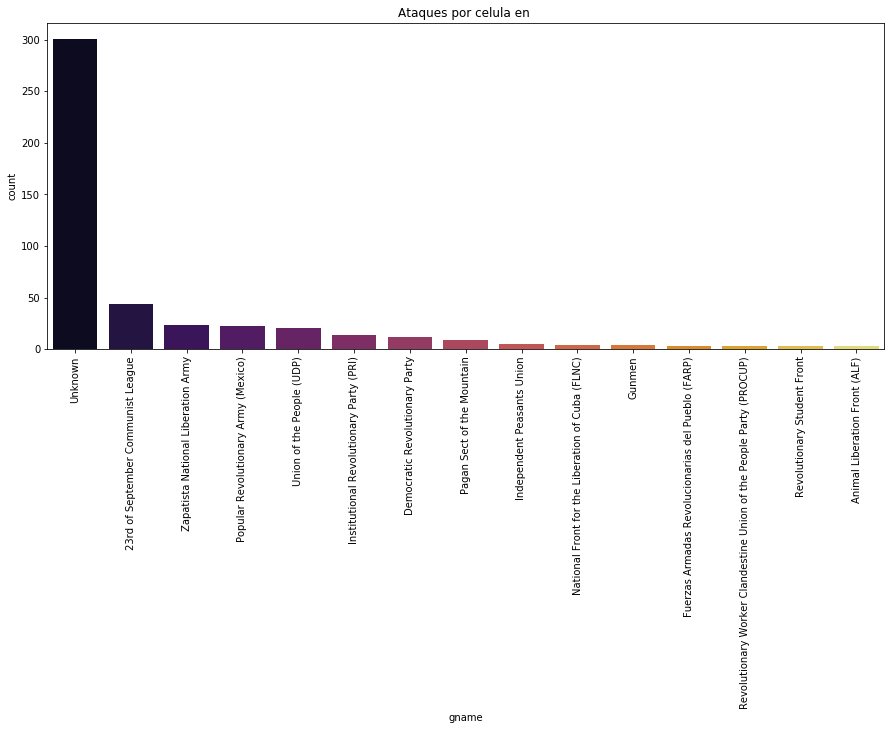

In [18]:
plt.subplots(figsize=(15,6))
sns.countplot('gname',data=bd,palette='inferno',order=bd.gname.value_counts()[:15].index)
plt.xticks(rotation=90)
plt.title('Ataques por celula en '.format(npais))
plt.show()

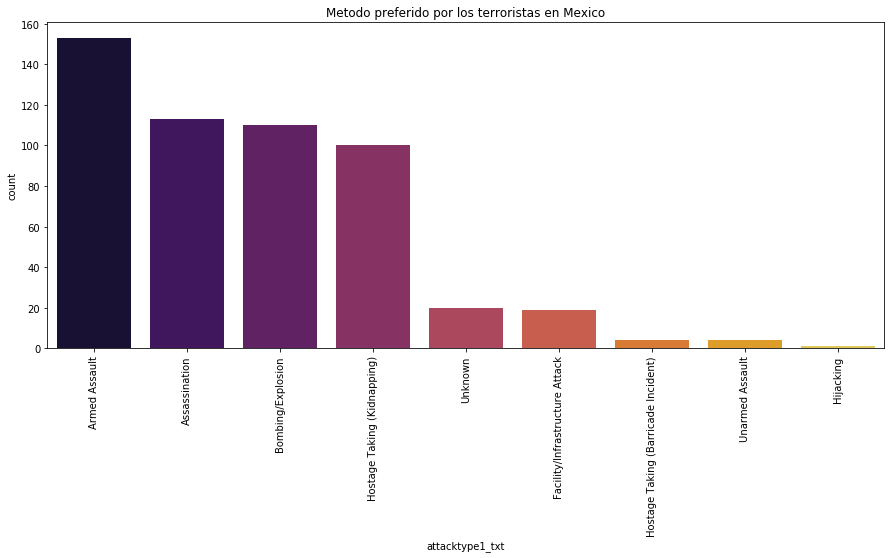

In [21]:
plt.subplots(figsize=(15,6))
sns.countplot('attacktype1_txt',data=bd,palette='inferno',order=bd['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Metodo preferido por los terroristas en {}'.format(npais))
plt.show()

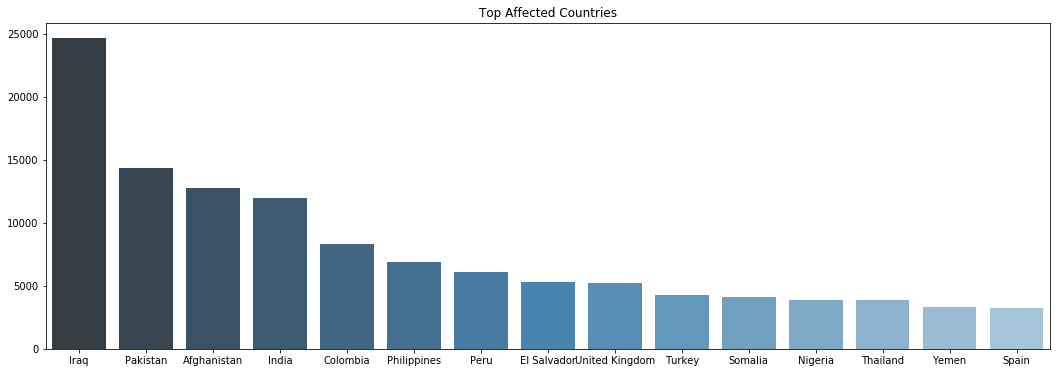

In [20]:
plt.subplots(figsize=(18,6))
sns.barplot(merged['NCountry'].value_counts()[:15].index,merged['NCountry'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Affected Countries'.format(npais))
plt.show()

In [118]:
bd.iyear.sum()

1045057

In [80]:
tiempo=time.asctime( time.localtime(time.time()))

In [120]:
pdf=FPDF()                             # por defecto se crea en formato dinA4, explicitamente FPDF('P', 'mm', 'A4')

pdf.add_page()                         # se añade una pagina, origen arriba a la izq a 1cm

#pdf.set_margins()                     # se pueden ajustar los margenes , set_top_margin, set_left_margin, set_right_margin, set_auto_page_break

pdf.set_font('Arial', 'B', 16)
pdf.image('logo.png', x=20, y=20, w=25, h=25, type = '', link = '')
pdf.cell(60) 
pdf.cell(70, 80, 'Informe de Contraterrorismo')       
pdf.line(5, 55, 200, 55)
pdf.set_font('Arial', '', 12)
pdf.cell(-20)  
pdf.cell(20, 100, 'pais: {}'.format(npais))
pdf.cell(-120)
pdf.cell(20, 110, 'fecha: {}'.format(tiempo))
pdf.cell(60)  
pdf.set_font('Arial', 'B', 16)
pdf.cell(-80)
pdf.cell(10, 120, 'Puntos clave del informe')
pdf.set_font('Arial', '', 12)
pdf.cell(-10)
pdf.cell(10, 140,"· Peor año de {} fue {}. Año donde había un atentado cada {} horas.".format(npais,anho,ratio_anho))
pdf.cell(-10)
pdf.cell(10, 150,"· Principal grupo organizado: {}.".format(npais))
pdf.cell(-10)
pdf.cell(10, 160,"· Probabilidad x cada 100k habitantes de sufrir un atentado: {}.".format(npais))
#pdf.image('logo.png', x=20, y=20, w=25, h=25, type = '', link = '')
#pdf.image('logo.png', x=20, y=20, w=25, h=25, type = '', link = '')


pdf.output('informe.pdf', 'F')      # guardado del pdf, en la misma carpeta que el archivo (nombre, destino)
# destino

''

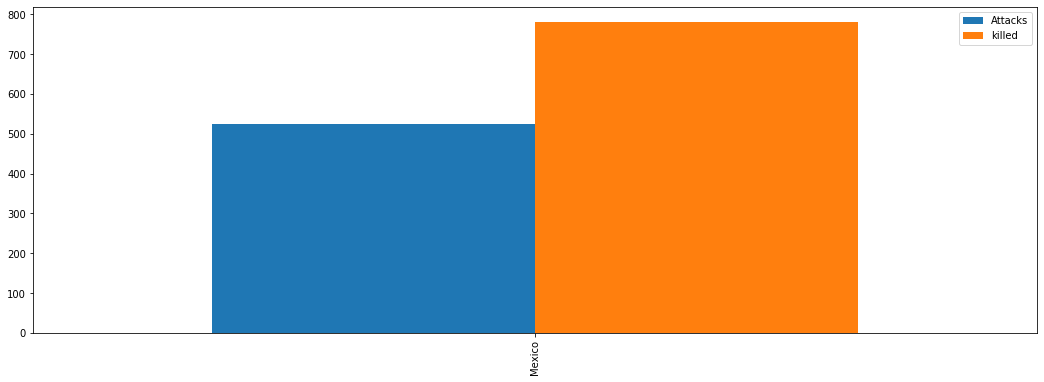

AttributeError: 'function' object has no attribute 'savefig'

In [123]:
coun_terror=bd['NCountry'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=bd.groupby('NCountry')['killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()
plt.figure.savefig('grafico.png')